In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot(ptp_offset,quic_offset,x,tittle,ylim=None,xlim=None):
    train_scores_mean = np.mean(ptp_offset)
    train_scores_std = np.std(ptp_offset)
    test_scores_mean = np.mean(quic_offset)
    test_scores_std = np.std(quic_offset)

    fig, axes = plt.subplots(1, 1, figsize=(15, 10))
    axes.grid(True)
    axes.set_title(f"{tittle}",fontsize=25)
    axes.set_xlabel(f"Time(S)",fontsize=20)
    axes.set_ylabel(f"Offset in ms",fontsize=20)
    if xlim is not None:
        axes.set_xlim(*xlim)
    else:
        axes.set_xlim(0,200)

    if ylim is not None:
        axes.set_ylim(*ylim)

    lw = 2
    axes.plot(
        x,
        ptp_offset,
        label="PTP_offset",
        color="darkorange",
        lw=lw,
    )
    axes.fill_between(
        x,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.2,
        color="darkorange",
        lw=lw,
    )
    axes.plot(
        x,
        quic_offset,
        label="QUIC_offset",
        color="blue",
        lw=lw,
    )
    axes.fill_between(
        x,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.2,
        color="navy",
        lw=lw,
    )
    axes.legend(loc="best",fontsize=20)
    return fig, axes

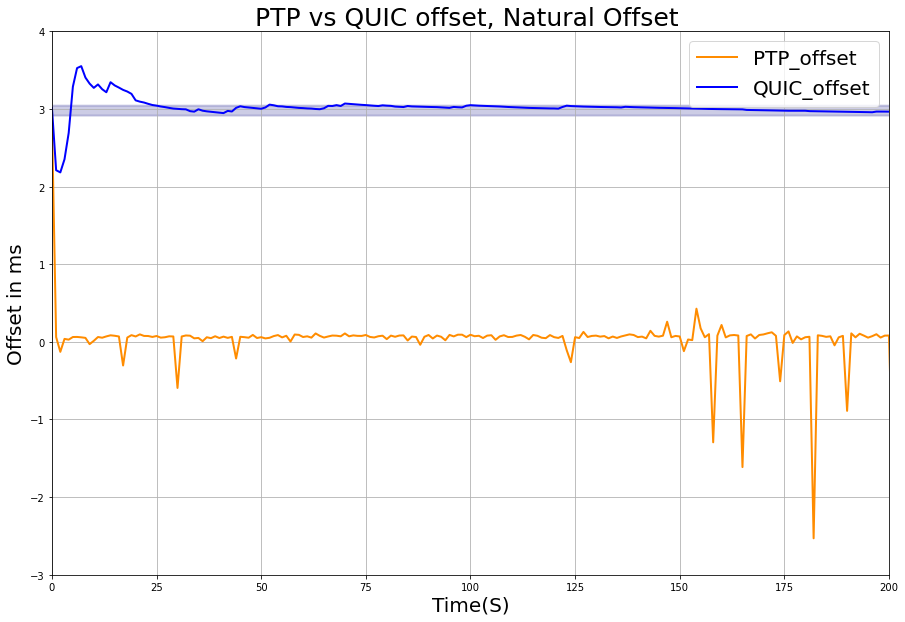

In [3]:
result_3 = pd.read_csv('ptp.csv')
y1 = (result_3["ptp"]*1000).tolist() 
y2 = (result_3["quic"]*1000).tolist() 
x =np.arange(0,len(y1))
figure,axesa = plot(y1,y2,x,tittle="PTP vs QUIC offset, Natural Offset ",ylim=(-3,4))
figure.savefig("figures/offset.png",bbox_inches='tight')

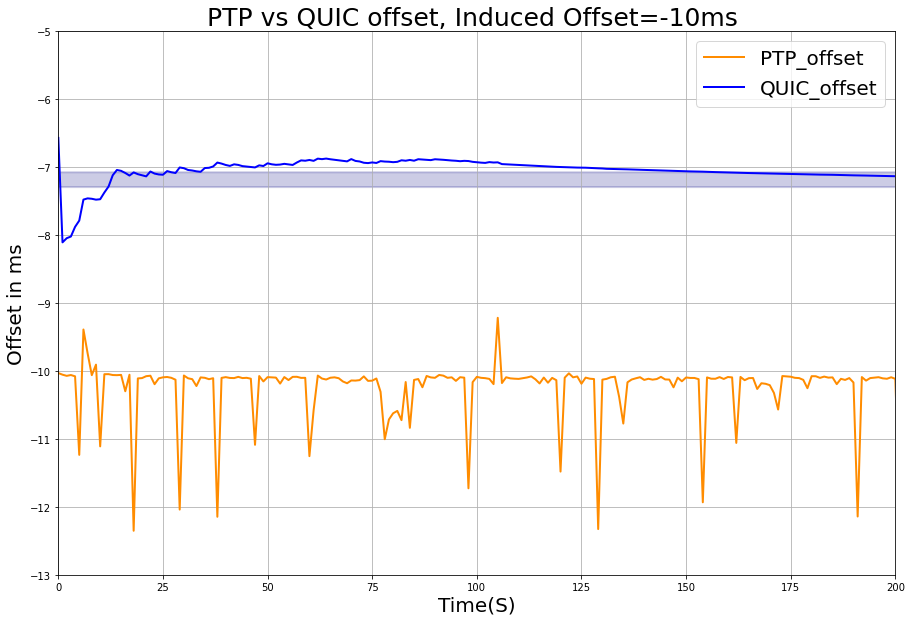

In [4]:
result_3 = pd.read_csv('ptp_-10.csv')
y1 = (result_3["ptp"]*1000).tolist() 
y2 = (result_3["quic"]*1000).tolist() 
x =np.arange(0,len(y1))
figure,axesa = plot(y1,y2,x,tittle="PTP vs QUIC offset, Induced Offset=-10ms ",ylim=(-13,-5))
figure.savefig("figures/offset_-10.png",bbox_inches='tight')

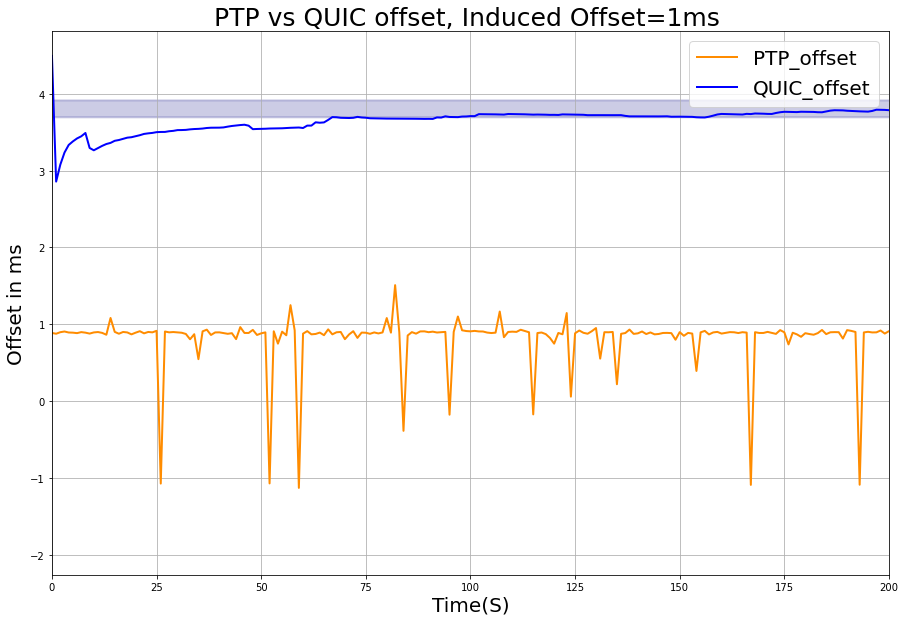

In [5]:
result_3 = pd.read_csv('ptp_1.csv')
y1 = (result_3["ptp"]*1000).tolist() 
y2 = (result_3["quic"]*1000).tolist() 
x =np.arange(0,len(y1))
figure,axesa = plot(y1,y2,x,tittle="PTP vs QUIC offset, Induced Offset=1ms ",ylim=None)
figure.savefig("figures/offset_1.png",bbox_inches='tight')

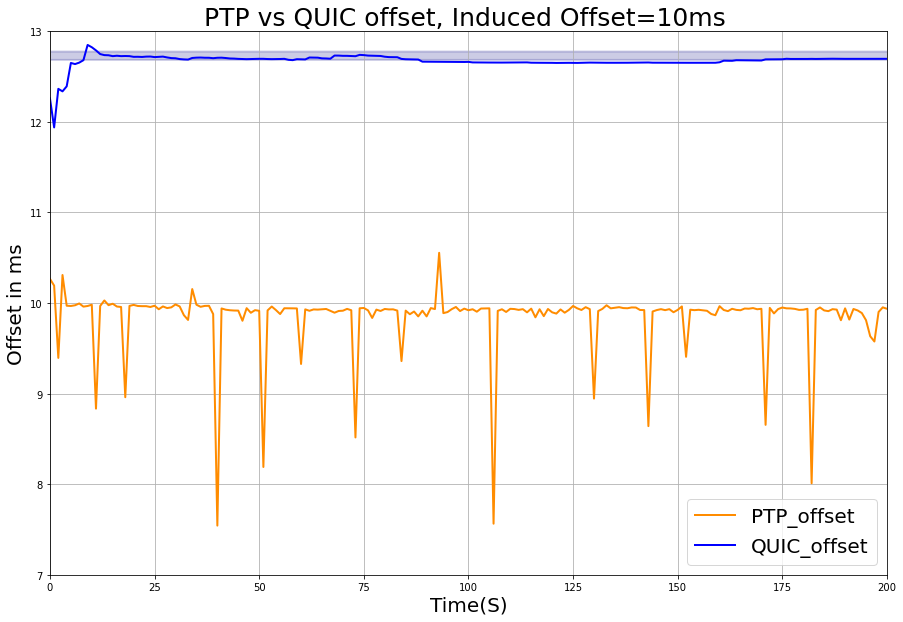

In [6]:
result_3 = pd.read_csv('ptp_10.csv')
y1 = (result_3["ptp"]*1000).tolist() 
y2 = (result_3["quic"]*1000).tolist() 
x =np.arange(0,len(y1))
figure,axesa = plot(y1,y2,x,tittle="PTP vs QUIC offset, Induced Offset=10ms ",ylim=(7,13))
figure.savefig("figures/offset_10.png",bbox_inches='tight')

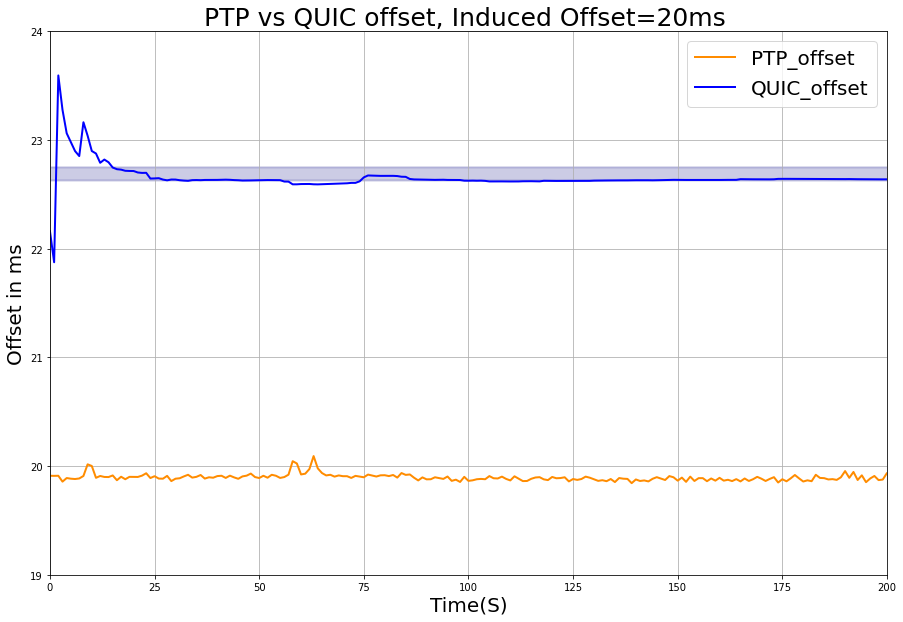

In [7]:
result_3 = pd.read_csv('ptp_20.csv')
y1 = (result_3["ptp"]*1000).tolist() 
y2 = (result_3["quic"]*1000).tolist() 
x =np.arange(0,len(y1))
figure,axesa = plot(y1,y2,x,tittle="PTP vs QUIC offset, Induced Offset=20ms ",ylim=(19,24))
figure.savefig("figures/offset_20.png",bbox_inches='tight')

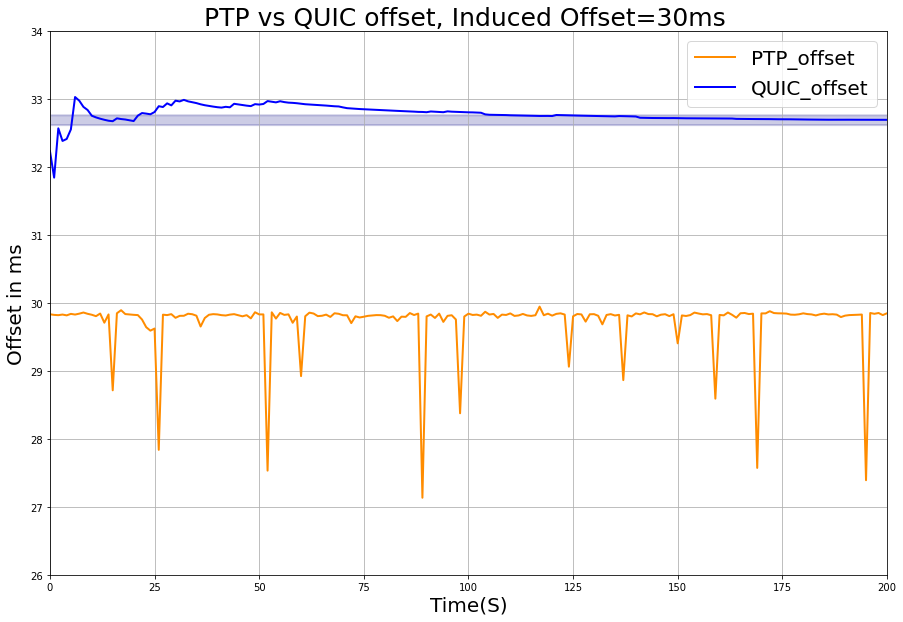

In [8]:
result_3 = pd.read_csv('ptp_30.csv')
y1 = (result_3["ptp"]*1000).tolist() 
y2 = (result_3["quic"]*1000).tolist() 
x =np.arange(0,len(y1))
figure,axesa = plot(y1,y2,x,tittle="PTP vs QUIC offset, Induced Offset=30ms ",ylim=(26,34))
figure.savefig("figures/offset_30.png",bbox_inches='tight')

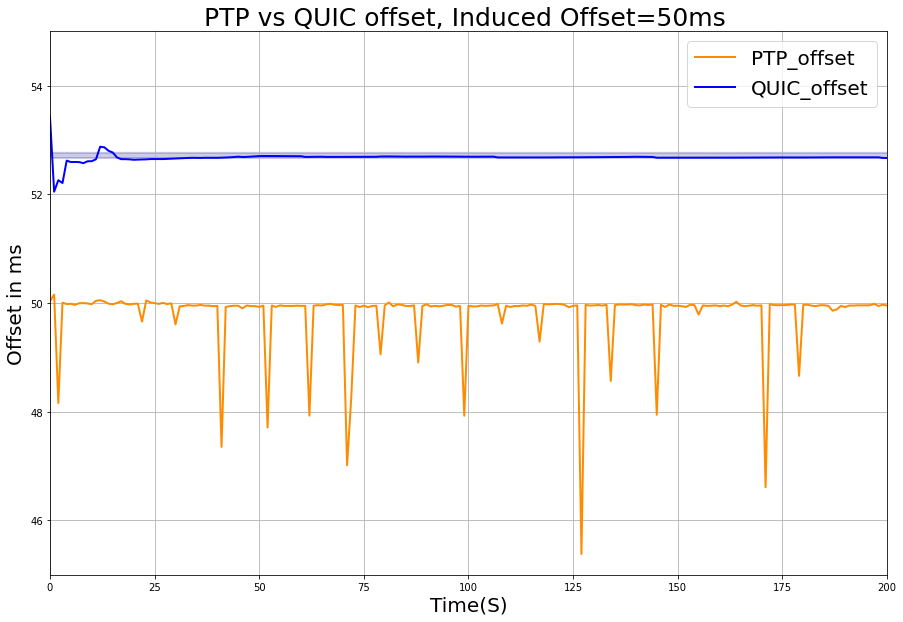

In [9]:
result_3 = pd.read_csv('ptp_50.csv')
y1 = (result_3["ptp"]*1000).tolist() 
y2 = (result_3["quic"]*1000).tolist() 
x =np.arange(0,len(y1))
figure,axesa = plot(y1,y2,x,tittle="PTP vs QUIC offset, Induced Offset=50ms ",ylim=(45,55))
figure.savefig("figures/offset_50.png",bbox_inches='tight')

In [10]:
result_3 = pd.read_csv('frame_50_3.csv')
y1 = (result_3["time"]*1000).tolist() 
y2 = (result_3["the"]*1000).tolist() 
y3 = (result_3["offset"]*1000).tolist()
y4 = result_3["raw"].tolist()
x= result_3["frame"].tolist() 

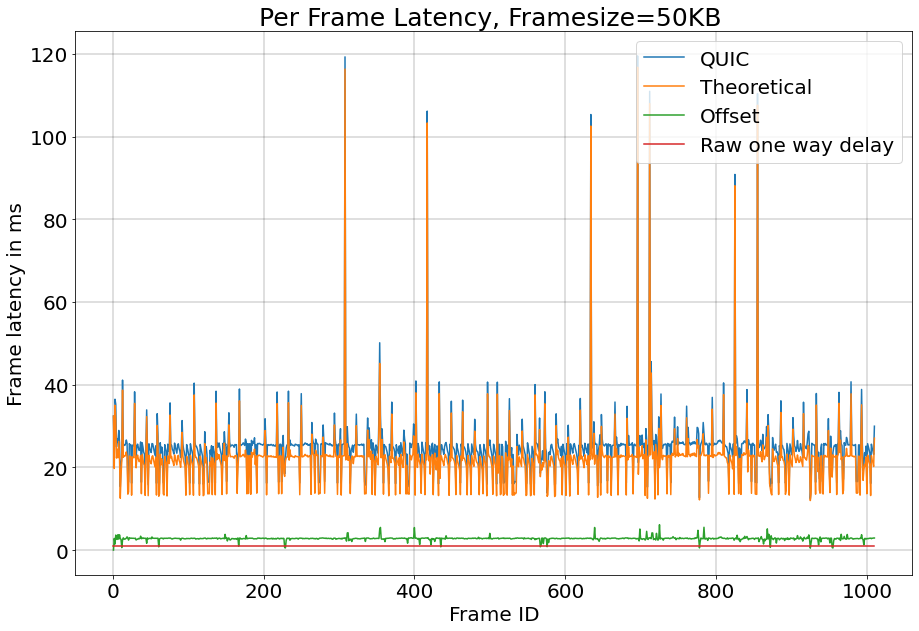

In [11]:
plt.figure(figsize=(15,10))
plt.plot(x, y1, label = "QUIC")
plt.plot(x, y2, label = "Theoretical")
plt.plot(x, y3, label = "Offset")
plt.plot(x, y4, label = "Raw one way delay")
#plt.ylim(-0.0, 10)
#plt.xlim(1, 200)
plt.xlabel('Frame ID',fontsize=20)
plt.ylabel('Frame latency in ms',fontsize=20)
plt.title('Per Frame Latency, Framesize=50KB ',fontsize=25)
plt.grid(True,color='black', linestyle='-', linewidth=0.25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20,loc="upper right")
filename_fig = "figures/frame_50KB_unzoomed.png"
plt.savefig(filename_fig,bbox_inches='tight')
plt.show()

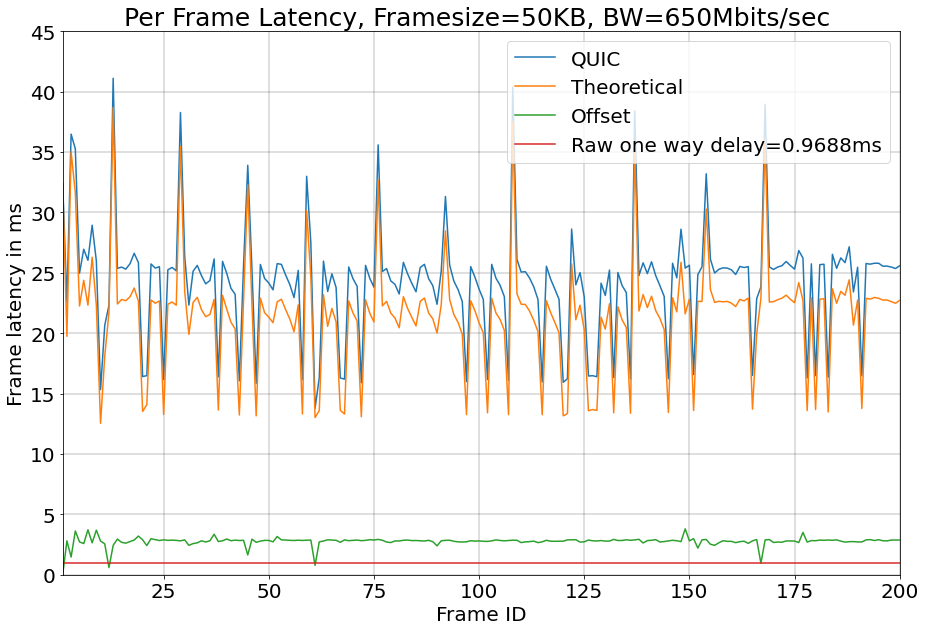

In [12]:
plt.figure(figsize=(15,10))
plt.plot(x, y1, label = "QUIC")
plt.plot(x, y2, label = "Theoretical")
plt.plot(x, y3, label = "Offset")
plt.plot(x, y4, label = "Raw one way delay=0.9688ms")
plt.ylim(0, 45)
plt.xlim(1, 200)
plt.xlabel('Frame ID',fontsize=20)
plt.ylabel('Frame latency in ms',fontsize=20)
plt.title('Per Frame Latency, Framesize=50KB, BW=650Mbits/sec ',fontsize=25)
plt.grid(True,color='black', linestyle='-', linewidth=0.25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20,loc="upper right")
filename_fig = "figures/frame_50KB_650.png"
plt.savefig(filename_fig,bbox_inches='tight')
plt.show()

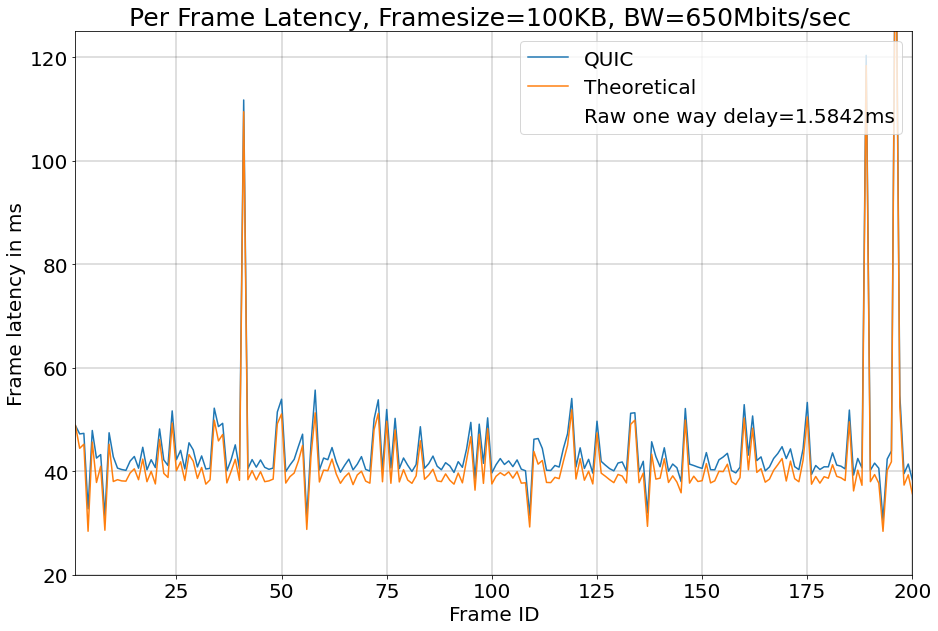

In [13]:
result = pd.read_csv('frame_100.csv')
y1 = (result["time"]*1000).tolist() 
y2 = (result["the"]*1000).tolist() 
y3 = (result["offset"]*1000).tolist()
y4 = result["raw"].tolist()
x= result["frame"].tolist() 
plt.figure(figsize=(15,10))
plt.plot(x, y1, label = "QUIC")
plt.plot(x, y2, label = "Theoretical")
#plt.plot(x, y3, label = "Offset")
plt.plot(x, y4, label = "Raw one way delay=1.5842ms",color='white')
plt.ylim(20, 125)
plt.xlim(1, 200)
plt.xlabel('Frame ID',fontsize=20)
plt.ylabel('Frame latency in ms',fontsize=20)
plt.title('Per Frame Latency, Framesize=100KB, BW=650Mbits/sec ',fontsize=25)
plt.grid(True,color='black', linestyle='-', linewidth=0.25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20,loc="upper right")
filename_fig = "figures/frame_100KB_650.png"
plt.savefig(filename_fig,bbox_inches='tight')
plt.show()

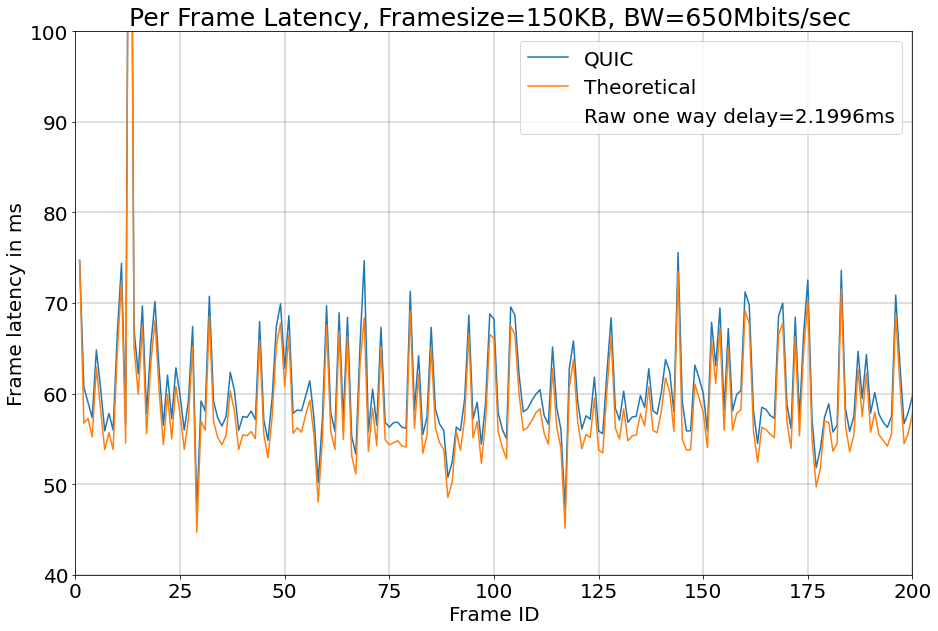

In [14]:
result = pd.read_csv('frame_150.csv')
y1 = (result["time"]*1000).tolist() 
y2 = (result["the"]*1000).tolist() 
y3 = (result["offset"]*1000).tolist()
y4 = result["raw"].tolist()
x= result["frame"].tolist() 
plt.figure(figsize=(15,10))
plt.plot(x, y1, label = "QUIC")
plt.plot(x, y2, label = "Theoretical")
#plt.plot(x, y3, label = "Offset")
plt.plot(x, y4, label = "Raw one way delay=2.1996ms",color='white')
plt.ylim(40, 100)
plt.xlim(0, 200)
plt.xlabel('Frame ID',fontsize=20)
plt.ylabel('Frame latency in ms',fontsize=20)
plt.title('Per Frame Latency, Framesize=150KB, BW=650Mbits/sec ',fontsize=25)
plt.grid(True,color='black', linestyle='-', linewidth=0.25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20,loc="upper right")
filename_fig = "figures/frame_150KB_650.png"
plt.savefig(filename_fig,bbox_inches='tight')
plt.show()

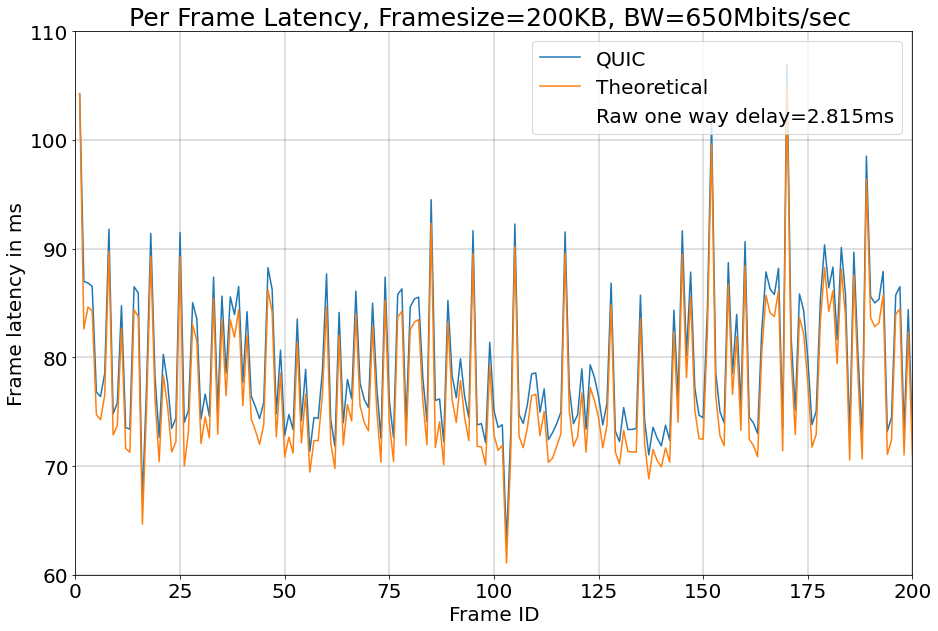

In [15]:
result = pd.read_csv('frame_200.csv')
y1 = (result["time"]*1000).tolist() 
y2 = (result["the"]*1000).tolist() 
y3 = (result["offset"]*1000).tolist()
y4 = result["raw"].tolist()
x= result["frame"].tolist() 
plt.figure(figsize=(15,10))
plt.plot(x, y1, label = "QUIC")
plt.plot(x, y2, label = "Theoretical")
#plt.plot(x, y3, label = "Offset")
plt.plot(x, y4, label = "Raw one way delay=2.815ms",color='white')
plt.ylim(60, 110)
plt.xlim(0, 200)
plt.xlabel('Frame ID',fontsize=20)
plt.ylabel('Frame latency in ms',fontsize=20)
plt.title('Per Frame Latency, Framesize=200KB, BW=650Mbits/sec ',fontsize=25)
plt.grid(True,color='black', linestyle='-', linewidth=0.25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20,loc="upper right")
filename_fig = "figures/frame_200KB_650.png"
plt.savefig(filename_fig,bbox_inches='tight')
plt.show()

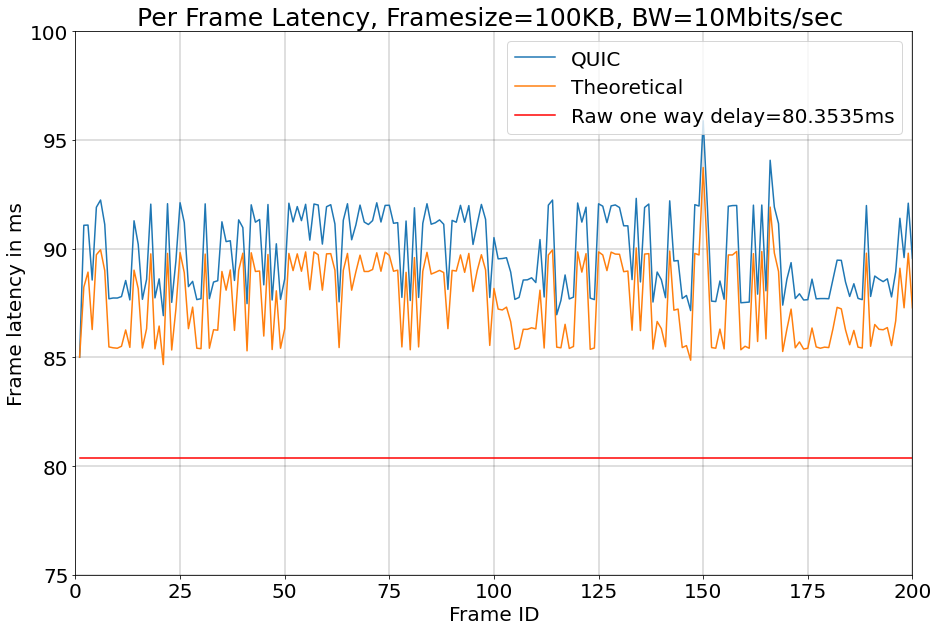

In [16]:
result = pd.read_csv('frame_100_10.csv')
y1 = (result["time"]*1000).tolist() 
y2 = (result["the"]*1000).tolist() 
y3 = (result["offset"]*1000).tolist()
y4 = result["raw"].tolist()
x= result["frame"].tolist() 
plt.figure(figsize=(15,10))
plt.plot(x, y1, label = "QUIC")
plt.plot(x, y2, label = "Theoretical")
#plt.plot(x, y3, label = "Offset")
plt.plot(x, y4, label = "Raw one way delay=80.3535ms",color='red')
plt.ylim(75, 100)
plt.xlim(0, 200)
plt.xlabel('Frame ID',fontsize=20)
plt.ylabel('Frame latency in ms',fontsize=20)
plt.title('Per Frame Latency, Framesize=100KB, BW=10Mbits/sec ',fontsize=25)
plt.grid(True,color='black', linestyle='-', linewidth=0.25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20,loc="upper right")
filename_fig = "figures/frame_100KB_10.png"
plt.savefig(filename_fig,bbox_inches='tight')
plt.show()

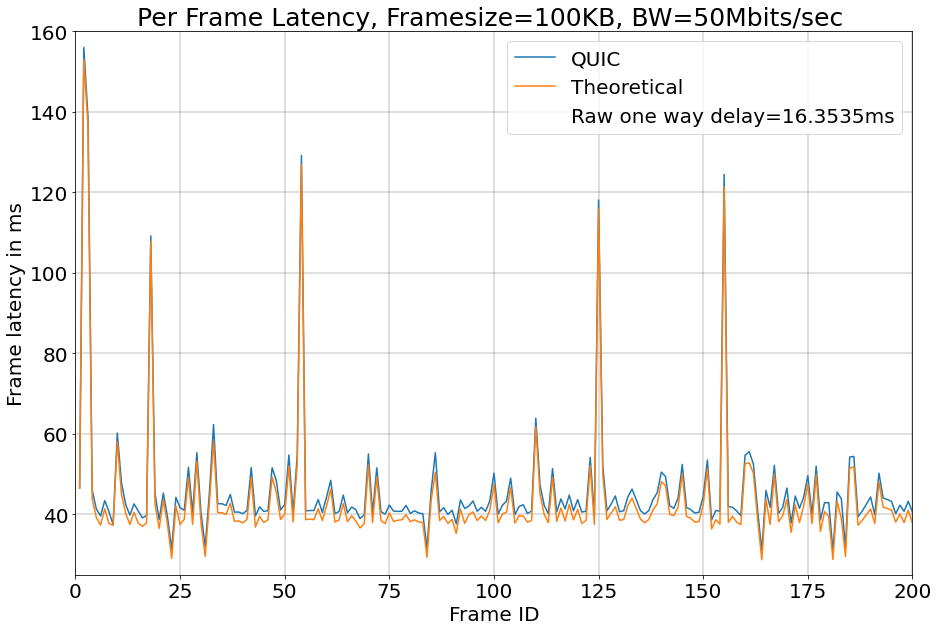

In [17]:
result = pd.read_csv('frame_100_50.csv')
y1 = (result["time"]*1000).tolist() 
y2 = (result["the"]*1000).tolist() 
y3 = (result["offset"]*1000).tolist()
y4 = result["raw"].tolist()
x= result["frame"].tolist() 
plt.figure(figsize=(15,10))
plt.plot(x, y1, label = "QUIC")
plt.plot(x, y2, label = "Theoretical")
#plt.plot(x, y3, label = "Offset")
plt.plot(x, y4, label = "Raw one way delay=16.3535ms",color='white')
plt.ylim(25, 160)
plt.xlim(0, 200)
plt.xlabel('Frame ID',fontsize=20)
plt.ylabel('Frame latency in ms',fontsize=20)
plt.title('Per Frame Latency, Framesize=100KB, BW=50Mbits/sec ',fontsize=25)
plt.grid(True,color='black', linestyle='-', linewidth=0.25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20,loc="upper right")
filename_fig = "figures/frame_100KB_50.png"
plt.savefig(filename_fig,bbox_inches='tight')
plt.show()

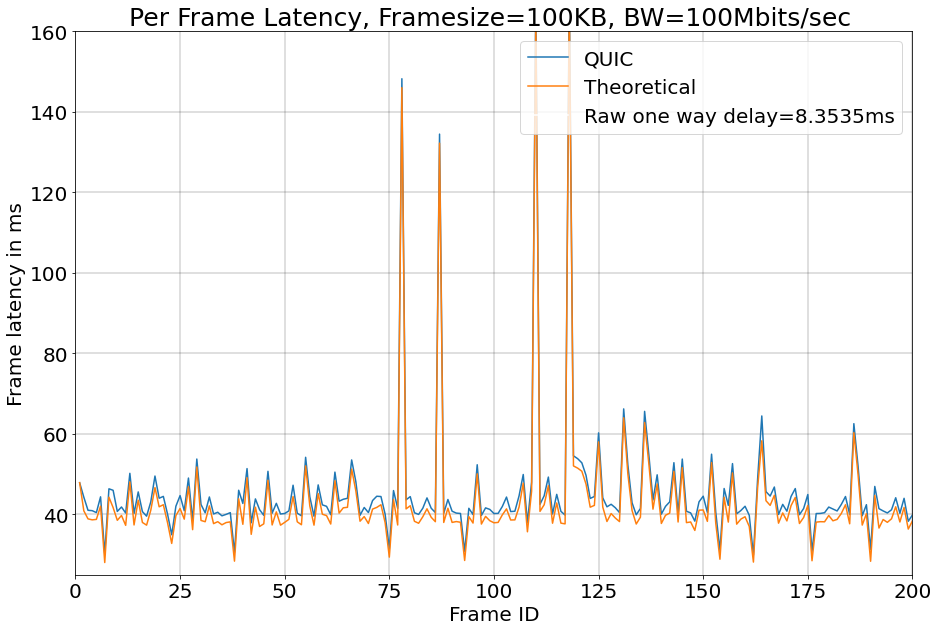

In [18]:
result = pd.read_csv('frame_100_100.csv')
y1 = (result["time"]*1000).tolist() 
y2 = (result["the"]*1000).tolist() 
y3 = (result["offset"]*1000).tolist()
y4 = result["raw"].tolist()
x= result["frame"].tolist() 
plt.figure(figsize=(15,10))
plt.plot(x, y1, label = "QUIC")
plt.plot(x, y2, label = "Theoretical")
#plt.plot(x, y3, label = "Offset")
plt.plot(x, y4, label = "Raw one way delay=8.3535ms",color='white')
plt.ylim(25, 160)
plt.xlim(0, 200)
plt.xlabel('Frame ID',fontsize=20)
plt.ylabel('Frame latency in ms',fontsize=20)
plt.title('Per Frame Latency, Framesize=100KB, BW=100Mbits/sec ',fontsize=25)
plt.grid(True,color='black', linestyle='-', linewidth=0.25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20,loc="upper right")
filename_fig = "figures/frame_100KB_100.png"
plt.savefig(filename_fig,bbox_inches='tight')
plt.show()

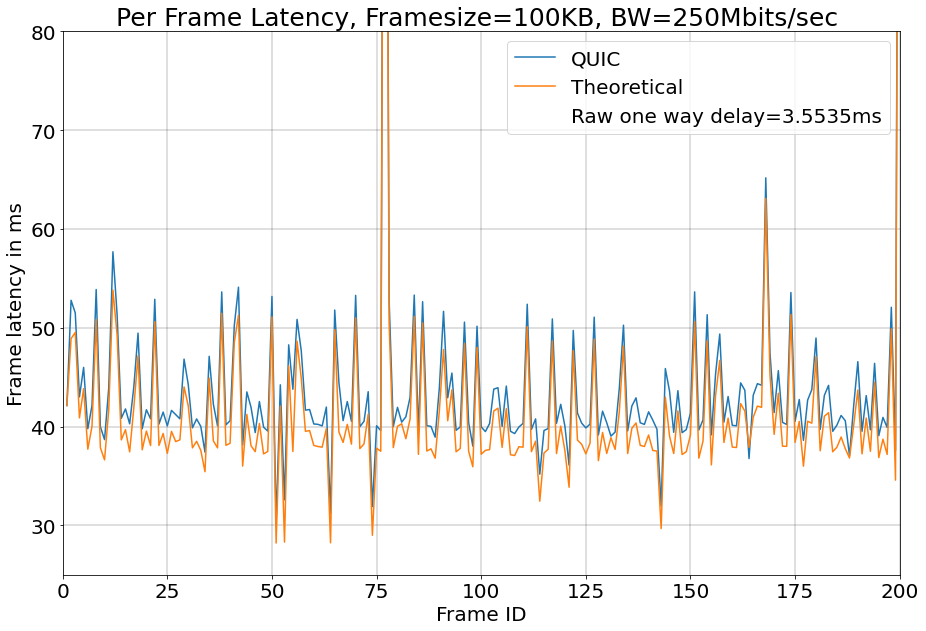

In [19]:
result = pd.read_csv('frame_100_250.csv')
y1 = (result["time"]*1000).tolist() 
y2 = (result["the"]*1000).tolist() 
y3 = (result["offset"]*1000).tolist()
y4 = result["raw"].tolist()
x= result["frame"].tolist() 
plt.figure(figsize=(15,10))
plt.plot(x, y1, label = "QUIC")
plt.plot(x, y2, label = "Theoretical")
#plt.plot(x, y3, label = "Offset")
plt.plot(x, y4, label = "Raw one way delay=3.5535ms",color='white')
plt.ylim(25, 80)
plt.xlim(0, 200)
plt.xlabel('Frame ID',fontsize=20)
plt.ylabel('Frame latency in ms',fontsize=20)
plt.title('Per Frame Latency, Framesize=100KB, BW=250Mbits/sec ',fontsize=25)
plt.grid(True,color='black', linestyle='-', linewidth=0.25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20,loc="upper right")
filename_fig = "figures/frame_100KB_250.png"
plt.savefig(filename_fig,bbox_inches='tight')
plt.show()

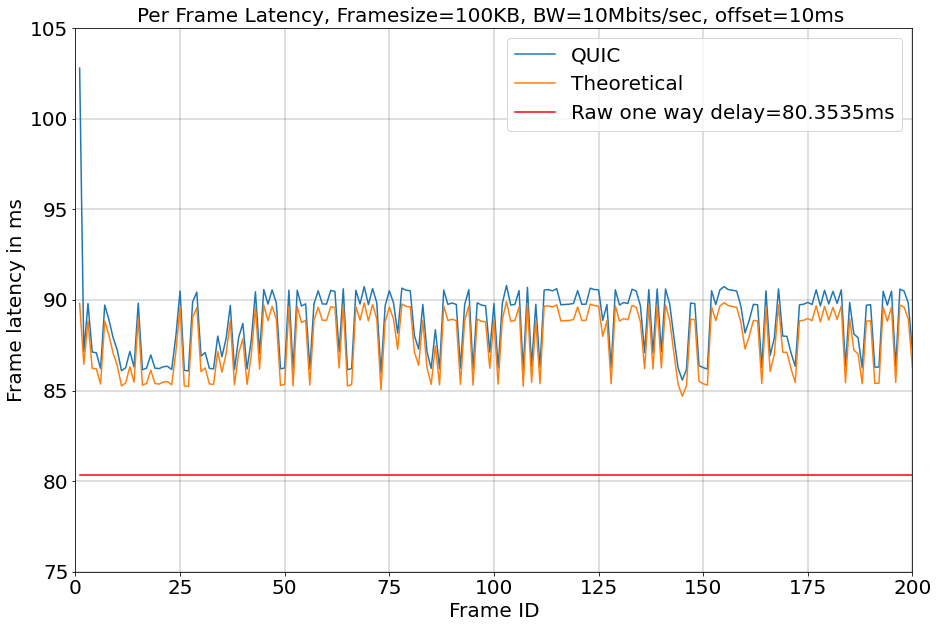

In [20]:
result = pd.read_csv('frame_100_10_10.csv')
y1 = (result["time_2"]*1000).tolist() 
y2 = (result["the"]*1000).tolist() 
y3 = (result["offset"]*1000).tolist()
y4 = result["raw"].tolist()
x= result["frame"].tolist() 
plt.figure(figsize=(15,10))
plt.plot(x, y1, label = "QUIC")
plt.plot(x, y2, label = "Theoretical")
#plt.plot(x, y3, label = "Offset")
plt.plot(x, y4, label = "Raw one way delay=80.3535ms",color='red')
plt.ylim(75, 105)
plt.xlim(0, 200)
plt.xlabel('Frame ID',fontsize=20)
plt.ylabel('Frame latency in ms',fontsize=20)
plt.title('Per Frame Latency, Framesize=100KB, BW=10Mbits/sec, offset=10ms ',fontsize=20)
plt.grid(True,color='black', linestyle='-', linewidth=0.25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20,loc="upper right")
filename_fig = "figures/frame_100KB_10_10.png"
plt.savefig(filename_fig,bbox_inches='tight')
plt.show()

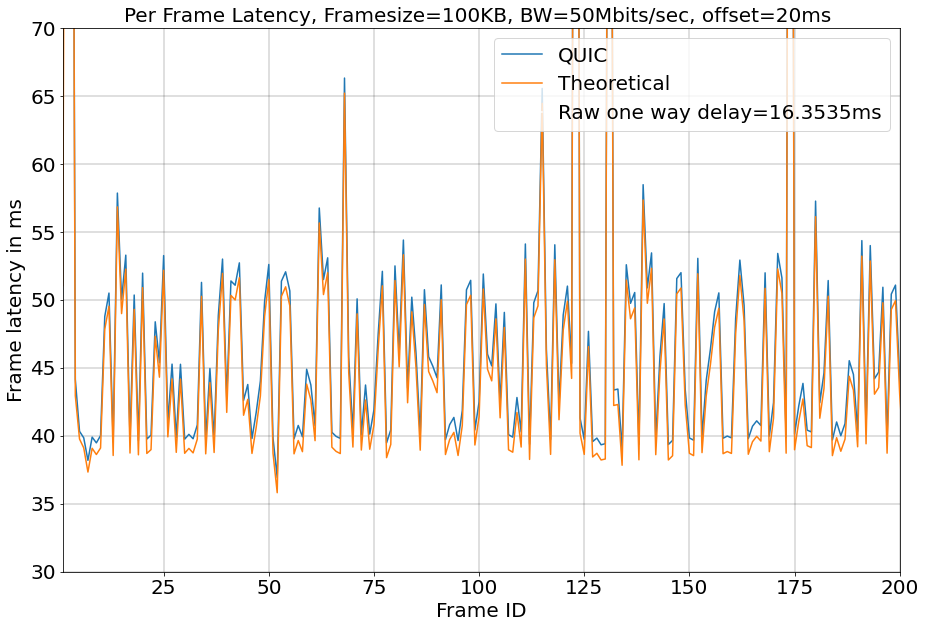

In [21]:
result = pd.read_csv('frame_100_50_20.csv')
y1 = (result["time_2"]*1000).tolist() 
y2 = (result["the"]*1000).tolist() 
y3 = (result["offset"]*1000).tolist()
y4 = result["raw"].tolist()
x= result["frame"].tolist() 
plt.figure(figsize=(15,10))
plt.plot(x, y1, label = "QUIC")
plt.plot(x, y2, label = "Theoretical")
#plt.plot(x, y3, label = "Offset")
plt.plot(x, y4, label = "Raw one way delay=16.3535ms",color='white')
plt.ylim(30, 70)
plt.xlim(1, 200)
plt.xlabel('Frame ID',fontsize=20)
plt.ylabel('Frame latency in ms',fontsize=20)
plt.title('Per Frame Latency, Framesize=100KB, BW=50Mbits/sec, offset=20ms ',fontsize=20)
plt.grid(True,color='black', linestyle='-', linewidth=0.25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20,loc="upper right")
filename_fig = "figures/frame_100KB_50_20.png"
plt.savefig(filename_fig,bbox_inches='tight')
plt.show()

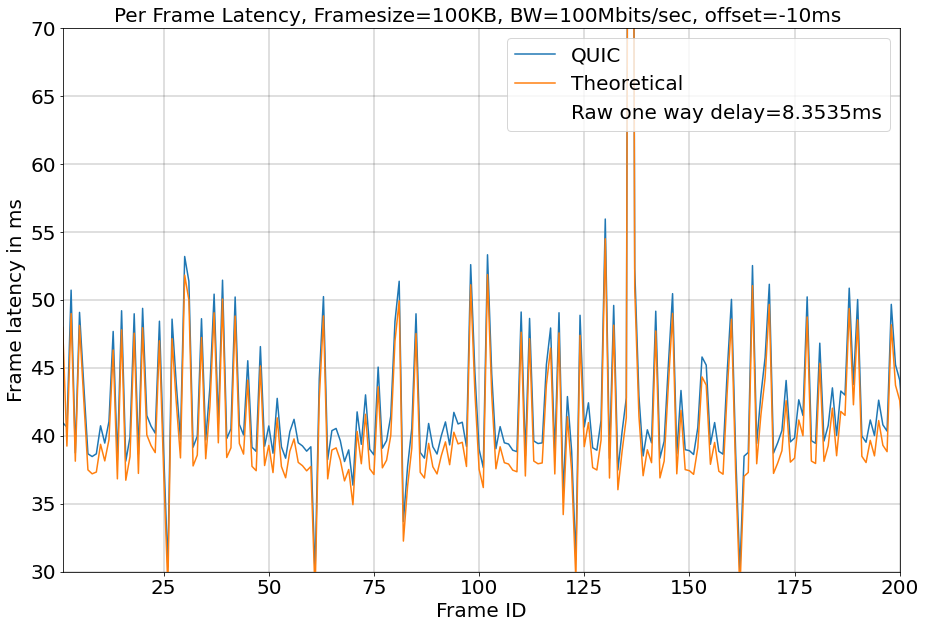

In [22]:
result = pd.read_csv('frame_100_100_-10.csv')
y1 = (result["time_2"]*1000).tolist() 
y2 = (result["the"]*1000).tolist() 
y3 = (result["offset"]*1000).tolist()
y4 = result["raw"].tolist()
x= result["frame"].tolist() 
plt.figure(figsize=(15,10))
plt.plot(x, y1, label = "QUIC")
plt.plot(x, y2, label = "Theoretical")
#plt.plot(x, y3, label = "Offset")
plt.plot(x, y4, label = "Raw one way delay=8.3535ms",color='white')
plt.ylim(30, 70)
plt.xlim(1, 200)
plt.xlabel('Frame ID',fontsize=20)
plt.ylabel('Frame latency in ms',fontsize=20)
plt.title('Per Frame Latency, Framesize=100KB, BW=100Mbits/sec, offset=-10ms ',fontsize=20)
plt.grid(True,color='black', linestyle='-', linewidth=0.25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20,loc="upper right")
filename_fig = "figures/frame_100KB_100_-10.png"
plt.savefig(filename_fig,bbox_inches='tight')
plt.show()